In [62]:
#빅데이터_분석&시각화 #미니실습,

# 머신러닝에서, 회귀 분석,
#
# 1) 데이터 수집 및 전처리 , 제공된 데이터 이용.
# 2) 데이터, 학습용 , 평가용 분리 7:3
# 3) 회귀 모델 불러오기.
# 4) 회귀 모델 학습, fit
# 5) 학습된 모델을 이용해서, 예측값 구하기.
# 6) 모델을 이용해서 구한 예측값 vs 실제값 , MSE(평균제곱오차), R^2,
# 7) 각 x , 독립변수 가 , 종속변수(결괏값) 영향을 미치는 부분 그래프 표현하기.
#
# ==============================================================
# 2) 와인 등급,
#
# -> 머신러닝으로, 회귀분석 해보세요.
# 프로세스
# 1) ~ 7)
#
# 아래의 변수로 추출해서, 작업하기.
#
# 독립변수 : alcohol, fixed acidity, volatile acidity, citric acid,
# residual sugar, density
# 종속변수 : quality,

In [63]:
import numpy as np
import pandas as pd
# header = 0 -> csv 의 컬럼 -> df 의 컬럼으로 사용.
data_df = pd.read_csv("./winequality-red2.csv", header = 0 , engine="python")
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:

# 데이터 불러오기
data_df = pd.read_csv("./winequality-red2.csv", header=0, engine='python')
print(f"data_df 의 크기 : {data_df.shape}")
print(data_df.head())

# 결측치 처리 (결측치가 있는 행 삭제)
data_df = data_df.dropna()

data_df 의 크기 : (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

In [65]:
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 정의
X = data_df[['alcohol', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'density']]
y = data_df['quality']

# 데이터 분할 (학습 70%, 테스트 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"학습 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

학습 데이터 크기: (1119, 6), 테스트 데이터 크기: (480, 6)


In [66]:
from sklearn.linear_model import LinearRegression

# 회귀 모델 불러오기
model = LinearRegression()

In [67]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# 예측값 구하기
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.4416
R^2: 0.3035


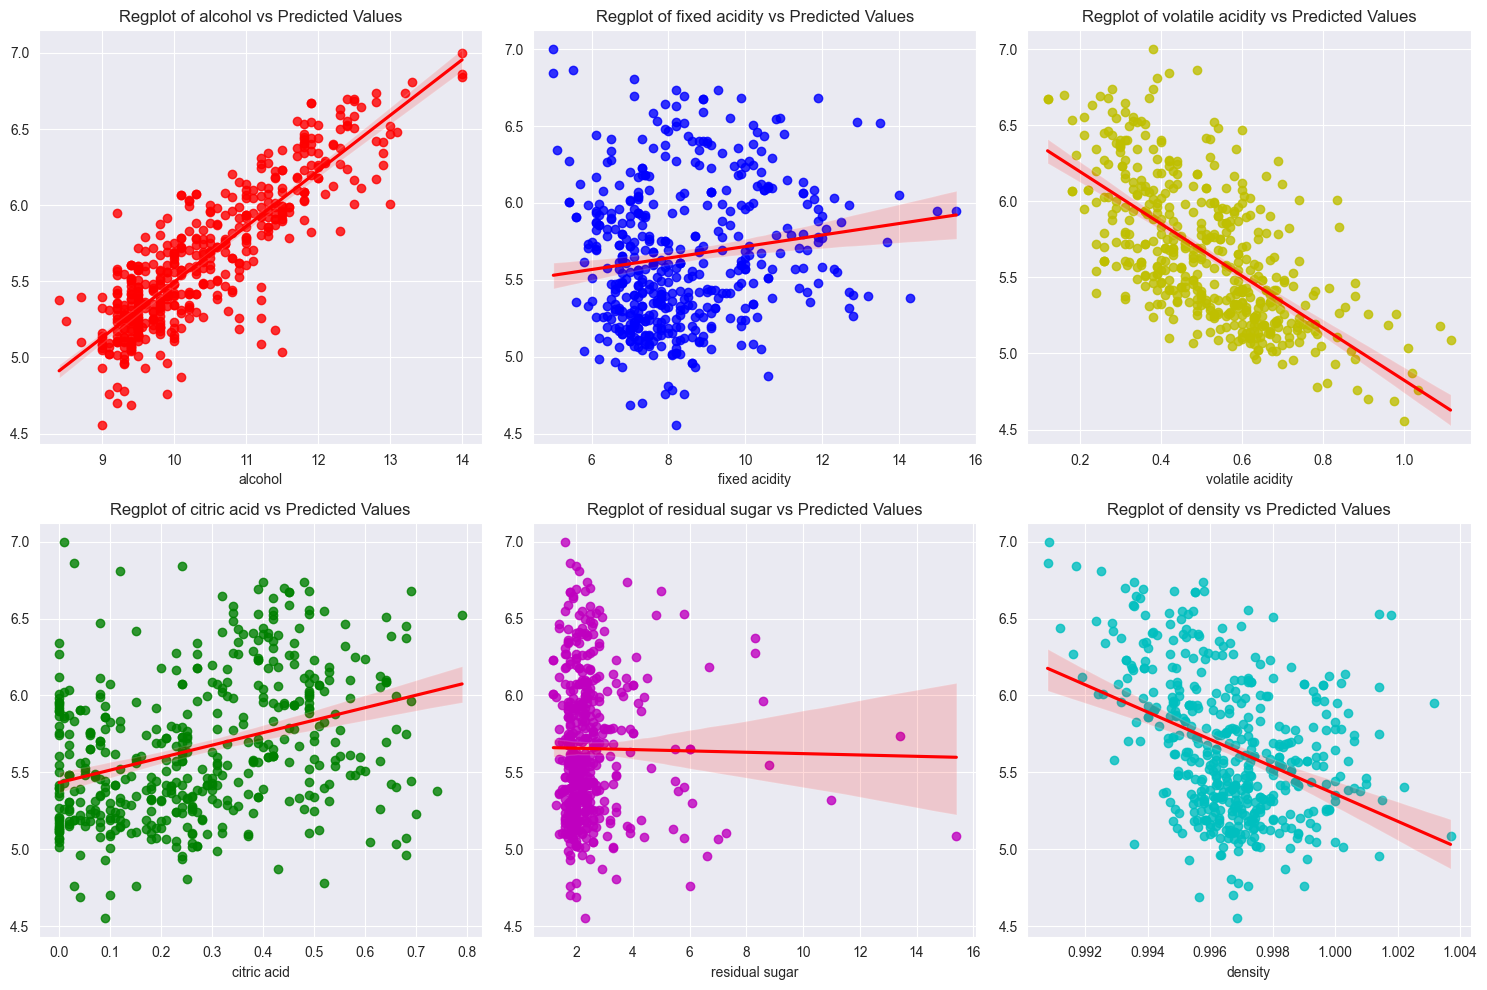

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 그래프 설정
num_features = len(X.columns)
cols = 3  # 각 행에 3개의 그래프
rows = (num_features + cols - 1) // cols  # 필요한 행 수 계산

# 색상 옵션 설정 (X.columns의 개수에 맞춰 색상 배열 크기 조정)
plot_color = ["r", "b", "y", "g", "m", "c", "r"] * (num_features // 5 + 1)  # 색상 반복해서 길이 맞추기

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # 동적으로 행 크기 설정

# 각 독립 변수와 예측값 간의 관계 시각화 (regplot)
for i, feature in enumerate(X.columns):
    row = i // cols
    col = i % cols
    sns.regplot(x=X_test[feature], y=y_pred, ax=axes[row, col], line_kws={"color": "red"}, scatter_kws={"color": plot_color[i]})
    axes[row, col].set_title(f'Regplot of {feature} vs Predicted Values')

# 레이아웃 조정
plt.tight_layout()
plt.show()